In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import datetime
import pickle
from sklearn.externals import joblib

In [2]:
test = pd.read_csv('../data/train_SampleforClustering.csv', header=0, low_memory=False)

In [3]:
test.drop('id', axis=1, inplace=True)
test.drop('store_nbr', axis=1, inplace=True)
test.drop('item_nbr', axis=1, inplace=True)
test.drop('holidaytype', axis=1, inplace=True)
test.drop('holidaytype_n', axis=1, inplace=True)
test.drop('holidaytype_r', axis=1, inplace=True)

In [4]:
test.dropna(inplace=True)

In [9]:
unitsales = test['unit_sales']
test.drop('unit_sales', axis=1, inplace=True)

In [10]:
from sklearn.model_selection import train_test_split

X_train,X_test=train_test_split(test,test_size=0.5)

In [11]:
scores=[]
for k in range(1,20):
    kmeanM=KMeans(n_clusters=k)
    kmeanM.fit(X_train)
    scores.append(kmeanM.fit(X_train).score(X_train))
    print(kmeanM.fit(X_train).score(X_train))

-1.21245718773e+12
-781067052400.0
-470519339832.0
-324870088963.0
-258056753980.0
-208142553407.0
-173538105387.0
-150336162873.0
-132009127356.0
-113952889579.0
-103023440899.0
-92403107586.7
-84053306756.6
-76515699778.9
-68858641849.2
-63733592403.6
-58853526188.7
-54551816798.3
-51312211354.7


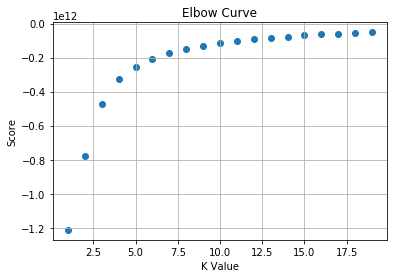

In [12]:
plt.close('all')
#plt.figure(figsize=(12,7))
plt.scatter(range(1,20), scores)
plt.grid()
plt.title('Elbow Curve')
plt.xlabel('K Value')
plt.ylabel('Score')
plt.show()

In [13]:
scores2=[]
for k in range(1,20):
    kmeanM2=KMeans(n_clusters=k)
    kmeanM2.fit(X_test)
    x = kmeanM2.fit(X_test).score(X_test)
    scores2.append(x)
    print(x)

-1.20787746376e+12
-777194059924.0
-466802333320.0
-323564799641.0
-256597421467.0
-207625071907.0
-172831061894.0
-149490666042.0
-131724717845.0
-113220144573.0
-102290929865.0
-92070864649.7
-83748297155.3
-75919224455.5
-68471727211.9
-63325151699.3
-58342744563.4
-54058246866.0
-51000508493.6


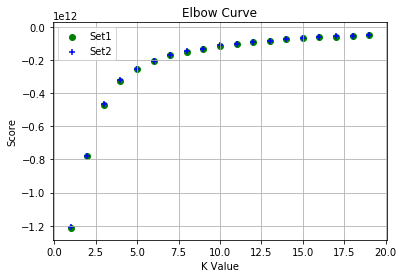

In [14]:
plt.close('all')
#plt.figure(figsize=(12,7))
plt.scatter(range(1,20), scores, color='g', label='Set1')
plt.scatter(range(1,20), scores2, color='b', marker='+', label='Set2')
plt.grid()
plt.title('Elbow Curve')
plt.xlabel('K Value')
plt.ylabel('Score')
plt.legend()
plt.show()

In [15]:
kmeanModel = KMeans(n_clusters=10)
kmeanModel.fit(test)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [17]:
labels = kmeanModel.labels_

clusters = pd.DataFrame({'unit_sales': unitsales,'label': labels})

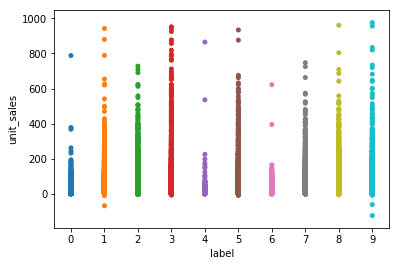

In [18]:
import seaborn as sns
plt.close('all')
sns.stripplot(x='label', y='unit_sales', data=clusters)
plt.show()

In [21]:
kmeanModel2 = KMeans(n_clusters=12)
kmeanModel2.fit(test)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=12, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

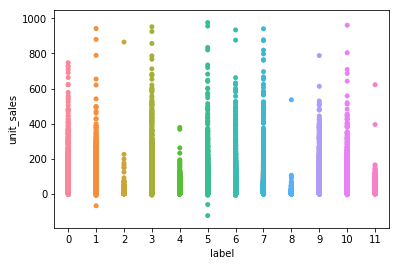

In [22]:
labels2 = kmeanModel2.labels_

clusters2 = pd.DataFrame({'unit_sales': unitsales,'label': labels2})

import seaborn as sns
plt.close('all')
sns.stripplot(x='label', y='unit_sales', data=clusters2)
plt.show()

In [20]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
#from matplotlib.ticker import NullFormatter
from matplotlib.pyplot import cm

In [23]:
test['label'] = labels

In [25]:
kc0 = test[test['label']==0]
kc1 = test[test['label']==1]
kc2 = test[test['label']==2]
kc3 = test[test['label']==3]
kc4 = test[test['label']==4]
kc5 = test[test['label']==5]
kc6 = test[test['label']==6]
kc7 = test[test['label']==7]
kc8 = test[test['label']==8]
kc9 = test[test['label']==9]

samp0= kc0.sample(n=8000)
samp1= kc1.sample(n=8000)
samp2= kc2.sample(n=8000)
samp3= kc3.sample(n=8000)
samp4= kc4.sample(n=8000)
samp5= kc5.sample(n=8000)
samp6= kc6.sample(n=8000)
samp7= kc7.sample(n=8000)
samp8= kc8.sample(n=8000)
samp9= kc9.sample(n=8000)

tsne2 = TSNE(perplexity=200, n_iter=250)

Y0 = tsne2.fit_transform(samp0)
Y1 = tsne2.fit_transform(samp1)
Y2 = tsne2.fit_transform(samp2)
Y3 = tsne2.fit_transform(samp3)
Y4 = tsne2.fit_transform(samp4)
Y5 = tsne2.fit_transform(samp5)
Y6 = tsne2.fit_transform(samp6)
Y7 = tsne2.fit_transform(samp7)
Y8 = tsne2.fit_transform(samp8)
Y9 = tsne2.fit_transform(samp9)

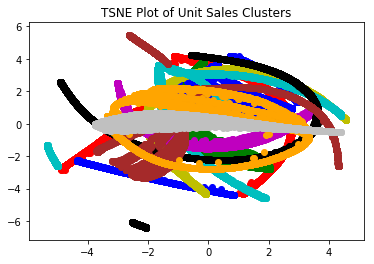

In [29]:
from matplotlib import colors as mcolors

plt.close('all')
plt.scatter(Y0[:, 0], Y0[:, 1], c='r')
plt.scatter(Y1[:, 0], Y1[:, 1], c='g')
plt.scatter(Y2[:, 0], Y2[:, 1], c='b')
plt.scatter(Y3[:, 0], Y3[:, 1], c='y')
plt.scatter(Y4[:, 0], Y4[:, 1], c='c')
plt.scatter(Y5[:, 0], Y5[:, 1], c='m')
plt.scatter(Y6[:, 0], Y6[:, 1], c='k')
plt.scatter(Y7[:, 0], Y7[:, 1], c='brown')
plt.scatter(Y8[:, 0], Y8[:, 1], c='orange')
plt.scatter(Y9[:, 0], Y9[:, 1], c='silver')
plt.title('TSNE Plot of Unit Sales Clusters')
plt.show()